<a href="https://colab.research.google.com/github/Saransh-khandelwal-123/CODSOFT-ML/blob/main/TITANIC_SURVIVAL_BY_SARANSH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TITANIC SURVIVAL PREDICTION





##IMPORT REQUIRED LIBRARIES

In [ ]:
import numpy as np    # linear algebra
import pandas as pd   # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns   # Seaborn is a Python data visualization library based on matplotlib
import matplotlib.pyplot as plt   # Matplotlib is a low level graph plotting library in python that serves as a visualization utility
import plotly.express as px    # allows you to create interactive plots with very little code
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

##Exploratory data analysis
Load and prepare data

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/tested.csv")

DATA ANALYSIS

In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


##DATA CLEANING

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
df.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

More than 98% NaN values belongs to Age and Cabin features.

In [ ]:
df.isnull().std()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            40.472693
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            4.891160
Cabin          41.317916
Embarked        0.000000
dtype: float64

More than 85% NaN values belongs to Age, Fare and Cabin features.

In [ ]:
df[df['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,0,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [ ]:
df[df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,902,0,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S
22,914,1,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S
29,921,0,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C
33,925,1,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
36,928,1,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
408,1300,1,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
410,1302,1,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
df[df['Cabin'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
data = df.drop(columns=['PassengerId', 'Name', 'Ticket','Cabin'])
print (data.head(10))

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  34.5      0      0   7.8292        Q
1         1       3  female  47.0      1      0   7.0000        S
2         0       2    male  62.0      0      0   9.6875        Q
3         0       3    male  27.0      0      0   8.6625        S
4         1       3  female  22.0      1      1  12.2875        S
5         0       3    male  14.0      0      0   9.2250        S
6         1       3  female  30.0      0      0   7.6292        Q
7         0       2    male  26.0      1      1  29.0000        S
8         1       3  female  18.0      0      0   7.2292        C
9         0       3    male  21.0      2      0  24.1500        S


In [ ]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

df['Fare'] = df['Fare'].fillna(method ='ffill')

In [ ]:
print(df['Age'])

0      34.50000
1      47.00000
2      62.00000
3      27.00000
4      22.00000
         ...   
413    30.27259
414    39.00000
415    38.50000
416    30.27259
417    30.27259
Name: Age, Length: 418, dtype: float64


In [ ]:
print(df['Cabin'])

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
413     NaN
414    C105
415     NaN
416     NaN
417     NaN
Name: Cabin, Length: 418, dtype: object


In [ ]:
print(df['Fare'])

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418, dtype: float64


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [ ]:
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S
5,0,3,male,14.0,0,0,9.2250,S
6,1,3,female,30.0,0,0,7.6292,Q
7,0,2,male,26.0,1,1,29.0000,S
8,1,3,female,18.0,0,0,7.2292,C
9,0,3,male,21.0,2,0,24.1500,S


Pclass        -0.108615
Sex_Encoded    1.000000
Age           -0.000013
Fare           0.191514
Survived       1.000000
Name: Survived, dtype: float64


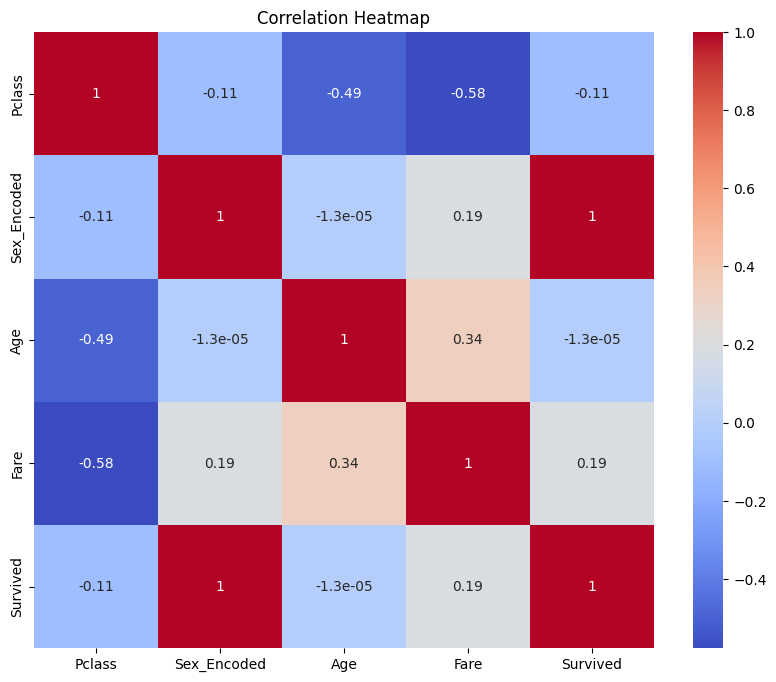

In [ ]:
data['Sex_Encoded'] = data['Sex'].map({'male': 1, 'female': 2})
# Assuming 'df' is the DataFrame containing the Titanic dataset

# Select the desired columns for correlation analysis
selected_columns = ['Pclass', 'Sex_Encoded', 'Age', 'Fare']
subset_df = data[selected_columns + ['Survived']]

# Compute the correlation matrix
corr_matrix = subset_df.corr()
print(corr_matrix.Survived)

# Create a heatmap using the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set the title of the plot
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

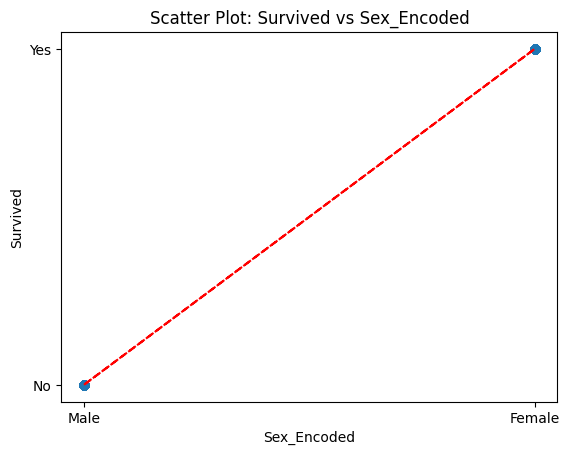

In [ ]:
# Scatter plot
plt.scatter(data['Sex_Encoded'], data['Survived'])

# Trend line
z = np.polyfit(data['Sex_Encoded'], data['Survived'], 1)
p = np.poly1d(z)
plt.plot(data['Sex_Encoded'], p(data['Sex_Encoded']), "r--")

# Plot labels
plt.xlabel('Sex_Encoded')
plt.ylabel('Survived')

# Plot title
plt.title('Scatter Plot: Survived vs Sex_Encoded')
plt.yticks([0, 1], ['No', 'Yes'])
plt.xticks([1,2], ['Male', 'Female'])
# Show the plot
plt.show()

Number of Males: 266
Number of Females: 152
Number of Male Survivors: 0
Number of Female Survivors: 152


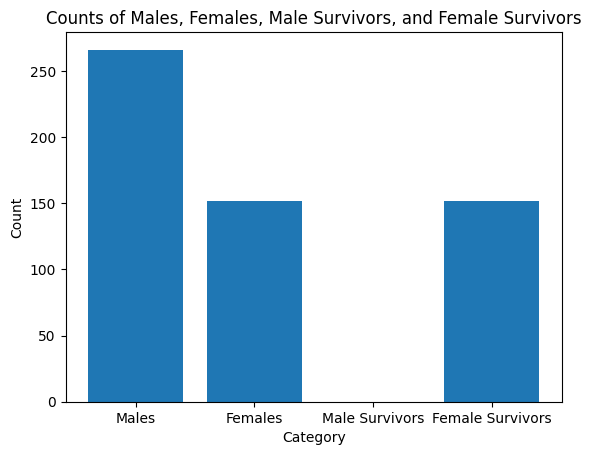

In [ ]:
num_male = len(data[data['Sex'] == 'male'])
num_female = len(data[data['Sex'] == 'female'])

male_survivors = len(data[(data['Sex'] == 'male') & (data['Survived'] == 1)])
female_survivors = len(data[(data['Sex'] == 'female') & (data['Survived'] == 1)])

print("Number of Males:", num_male)
print("Number of Females:", num_female)
print("Number of Male Survivors:", male_survivors)
print("Number of Female Survivors:", female_survivors)


labels = ['Males', 'Females', 'Male Survivors', 'Female Survivors']
counts = [num_male, num_female, male_survivors, female_survivors]

# Plotting
plt.bar(labels, counts)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Counts of Males, Females, Male Survivors, and Female Survivors')

# Display the plot
plt.show()

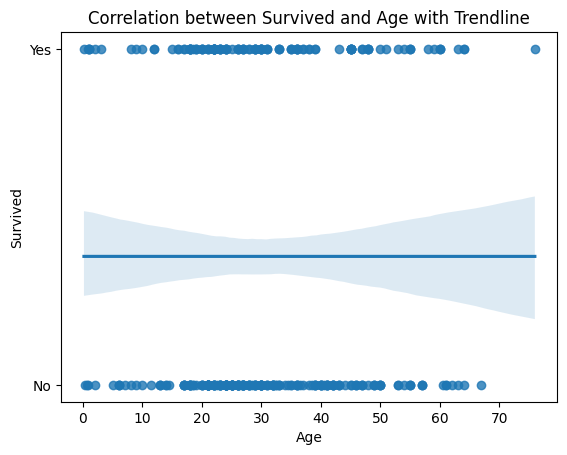

In [ ]:
import seaborn as sns

# Assuming 'data' is your DataFrame containing the 'Survived' and 'Age' columns
sns.regplot(x='Age', y='Survived', data=data, scatter=True)
plt.xlabel('Age')
plt.ylabel('Survived')
plt.title('Correlation between Survived and Age with Trendline')
plt.yticks([0, 1], ['No', 'Yes'])
plt.show()

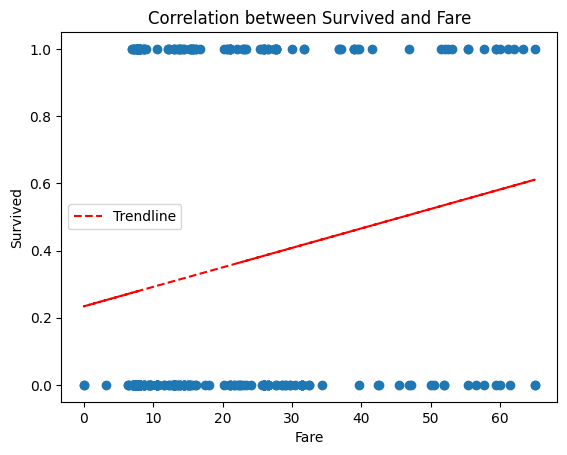

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Q1 = data['Fare'].quantile(0.25)
Q3 = data['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the Fare column
cleaned_data = data[(data['Fare'] >= lower_bound) & (data['Fare'] <= upper_bound)]

# Print the cleaned dataset
#print(cleaned_data)


# Calculate the trendline
fit = np.polyfit(cleaned_data['Fare'], cleaned_data['Survived'], 1)
trendline = np.polyval(fit, cleaned_data['Fare'])
# Plot the scatter plot with trendline
plt.scatter(cleaned_data['Fare'], cleaned_data['Survived'])
plt.plot(cleaned_data['Fare'], trendline, color='red', linestyle='--', label='Trendline')
plt.xlabel('Fare')
plt.ylabel('Survived')
plt.title('Correlation between Survived and Fare')
plt.legend()
plt.show()

##Summary of the Conclusions:
Based on the data analysis and calculation of correlation coefficients between different variables and the survival outcome on the Titanic, the following conclusions can be drawn:

Gender (the variable "Sex_Encoded") played a significant role in determining the survival rates. There was a strong positive correlation between gender and survival rates. This suggests that being female (encoded as 2) was associated with a higher likelihood of survival, while being male (encoded as 1) was associated with a lower likelihood of survival.

Gender had a significant impact on the distribution of survival on the ship. All female passengers in the dataset survived, while none of the male passengers survived. This indicates a stark difference in survival rates based on gender.

The weak positive correlation between "Survived" and "Fare" indicates a slight tendency for higher fare values to be associated with a slightly higher likelihood of survival. However, the correlation is relatively weak, and there may be other factors that have a stronger influence on survival outcomes.

There is no significant correlation between "Survived" and "Age," suggesting that age alone does not play a significant role in determining survival outcomes on the Titanic. However, it is important to note that there may be other factors that influence survival.

Further analysis is needed to explore other factors that may impact survival outcomes, such as passenger class, age, and others. Additional statistical tests and techniques can help uncover non-linear relationships or interactions that may exist.

In [78]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score


# Separate the target variable from the features
X = df.drop(columns=['Survived'])
y = df['Survived']

# Handle missing values (you can use more advanced methods based on your dataset)
X.fillna(X.mean(), inplace=True)

# Encode categorical features (if any)
le = LabelEncoder()
X['Sex'] = le.fit_transform(X['Sex'])
X['Embarked'] = le.fit_transform(X['Embarked'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49)

# Initialize the classifier
clf = HistGradientBoostingClassifier(max_iter=100, random_state=42)

# Train the model on the training data
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model : {accuracy:.2f}")


Accuracy of the model : 0.70
